In [1]:
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

In [13]:
# create the base url
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [2]:
### Generate Random Cities

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# create a list for holding cities
cities = []

# identify the nearest city for each latitude and longitude combination
for c in coordinates: 
    lat, lng = c[0], c[1]
    city = citipy.nearest_city(lat, lng).city_name
    
    if city not in cities:
        # if the name is unique, then add to the cities list
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

613

### Initialize an Empty List and Counters
### Loop through the List of Cities and Build the City URL

In [7]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the loutput_data_fileprint('Beginning data retrieval    ')
print('----------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if i%50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60)
        print('pausing...')
        print('----------------------------\n')
    
    # create endpoint url with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # log the url, record and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}.')
    record_count += 1

    try: 
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append the information to the city_data list
        city_data.append(
            {
                'City': city.title(),
                'Lat': city_lat,
                'Lng': city_lng,
                'Max Temp': city_max_temp,
                'Humidity': city_humidity,
                'Cloudiness': city_clouds,
                'Wind Speed': city_wind,
                'Country': city_country,
                'Date': city_date
            }
        )
    except:
        print('City not found. Skipping...')
        pass

# indicate that data loading is complete
print('----------------------------')
print('Data retrieval complete     ')
print('----------------------------')

Beginning data retrieval    
----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=arlit
Processing record 1 of set 1 | arlit.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=barrow
Processing record 2 of set 1 | barrow.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=rikitea
Processing record 3 of set 1 | rikitea.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=new+norfolk
Processing record 4 of set 1 | new norfolk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=provideniya
Processing record 5 of set 1 | provideniya.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90abc6c64ffe74abd9fad2385f0f3a29&q=flers
Processing record 6 of set 1 | flers.
http://api.openweathermap.org/

### Save the `city_data` List as a Pandas DataFrame; Create an output csv file

In [9]:
# convert the list of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [10]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2022-05-07 20:48:34,18.7369,7.3853,94.10,13,100,7.99
1,Barrow,US,2022-05-07 20:46:32,71.2906,-156.7887,21.22,93,100,10.36
2,Rikitea,PF,2022-05-07 20:48:35,-23.1203,-134.9692,77.29,83,63,13.22
3,New Norfolk,AU,2022-05-07 20:45:36,-42.7826,147.0587,51.30,72,93,2.93
4,Provideniya,RU,2022-05-07 20:48:36,64.3833,-173.3000,32.99,88,100,7.07
5,Flers,FR,2022-05-07 20:48:37,48.7372,-0.5747,50.25,99,9,4.43
6,Albany,US,2022-05-07 20:44:17,42.6001,-73.9662,59.34,34,100,1.01
7,Port Alfred,ZA,2022-05-07 20:48:33,-33.5906,26.8910,64.18,79,100,1.99
8,Doha,QA,2022-05-07 20:43:55,25.2867,51.5333,88.11,64,89,10.36
9,Tiksi,RU,2022-05-07 20:48:38,71.6872,128.8694,8.06,94,14,6.49


In [12]:
# create the output csv file
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label='City_ID')

### Plot the Data

In [21]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# get today's date
today = time.strftime('%x')

In [ ]:
#### Plot Latitude vs Max Temperature

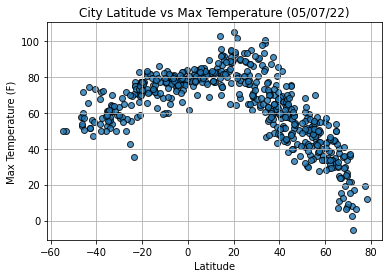

In [21]:
# build the scatter plot 
plt.scatter(
    lats, 
    max_temps,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show the plot 
plt.show()

#### Plot Latitude vs Humidity

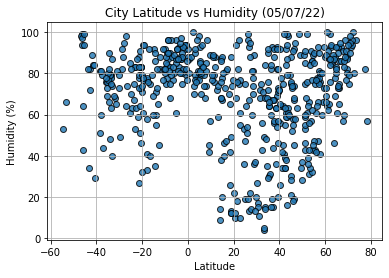

In [23]:
# build the scatter plot for 
plt.scatter(
    lats, 
    humidity,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig2.png')

# show the plot 
plt.show()

#### Plot Latitude vs Cloudiness

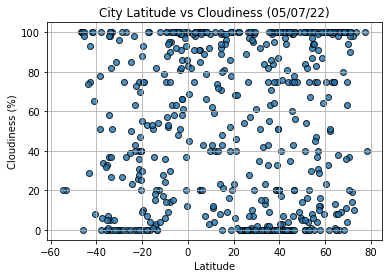

In [26]:
# build the scatter plot 
plt.scatter(
    lats, 
    cloudiness,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig3.png')

# show the plot 
plt.show()

#### Plot Latitude vs Wind Speed

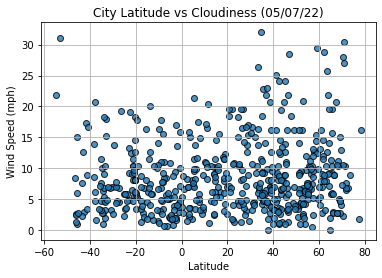

In [27]:
# build the scatter plot 
plt.scatter(
    lats, 
    wind_speed,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig4.png')

# show the plot 
plt.show()